In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ionoshere = pd.read_csv("ionosphere_data.csv")

In [ ]:
ionoshere

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [ ]:
ionoshere.isna().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [ ]:
ionoshere.dtypes

feature1       int64
feature2       int64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
label         object
dtype: object

In [ ]:
ionoshere_shuffle = ionoshere.sample(frac=1).reset_index(drop=True)

In [ ]:
ionoshere_shuffle

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.88208,-0.14639,0.93408,-0.11057,0.92100,-0.16450,0.88307,-0.17036,0.88462,-0.31809,0.85269,-0.31463,0.82116,-0.35924,0.80681,-0.33632,0.75243,-0.47022,0.70555,-0.47153,0.66150,-0.50085,0.61297,-0.48086,0.56804,-0.54629,0.50179,-0.59854,0.47075,-0.57377,0.42189,-0.58086,g
1,1,0,0.92277,0.07804,0.92679,0.16251,0.89702,0.24618,0.84111,0.35197,0.78801,0.42196,0.70716,0.46983,0.70796,0.56476,0.60459,0.64200,0.51247,0.64924,0.39903,0.66975,0.34232,0.68343,0.23693,0.76146,0.18765,0.73885,0.09694,0.71038,0.02735,0.77072,-0.04023,0.69509,g
2,1,0,0.08696,0.00686,0.13959,-0.04119,0.10526,-0.08238,0.12586,-0.06178,0.23341,-0.01144,0.12357,0.07780,0.14645,-0.13501,0.29062,-0.04805,0.18993,0.07323,0.11670,0.00000,0.11213,-0.00229,0.15103,-0.10297,0.08467,0.01373,0.11213,-0.06636,0.09611,-0.07323,0.11670,-0.06865,b
3,1,0,1.00000,0.50000,1.00000,0.25000,0.25000,1.00000,0.16851,0.91180,-0.13336,0.80454,-0.34107,0.60793,-0.43820,0.37856,-0.43663,0.16709,-0.36676,0.00678,-0.26477,-0.09025,-0.16178,-0.12964,-0.07782,-0.12744,-0.02089,-0.10242,0.01033,-0.07036,0.02224,-0.04142,0.02249,-0.02017,g
4,1,0,0.71521,-0.00647,0.66667,-0.04207,0.63107,-0.05178,0.77994,0.08091,0.67314,0.09709,0.64725,0.15858,0.60194,-0.01942,0.54369,-0.04531,0.46926,-0.10032,0.64725,0.14887,0.39159,0.21683,0.52427,-0.05502,0.45105,0.00040,0.31392,-0.06796,0.49191,-0.10680,0.30421,-0.05178,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.41932,0.12482,0.35000,0.12500,0.23182,0.27955,-0.03636,0.44318,0.04517,0.36194,-0.19091,0.33636,-0.13350,0.27322,0.02727,0.40455,-0.34773,0.12727,-0.20028,0.05078,-0.18636,0.36364,-0.14003,-0.04802,-0.09971,-0.07114,-1.00000,-1.00000,-0.02916,-0.07464,-0.00526,-0.06314,b
347,1,0,0.93669,-0.00190,0.60761,0.43204,0.92314,-0.40129,0.93123,0.16828,0.96197,0.09061,0.99676,0.08172,0.91586,0.05097,0.84628,-0.25324,0.87379,-0.14482,0.84871,0.26133,0.75081,-0.03641,0.84547,-0.02589,0.87293,-0.02302,0.98544,0.09385,0.78317,-0.10194,0.85841,-0.14725,g
348,1,0,0.76627,0.21106,0.63935,0.38112,0.48409,0.52500,0.15000,0.22273,0.13753,0.59565,-0.07727,0.44545,0.00000,0.48636,-0.27491,0.42014,-0.56136,0.36818,-0.36591,0.18864,-0.40533,0.07588,-0.38483,-0.03229,-0.33942,-0.12486,-0.27540,-0.19714,-0.19962,-0.24648,-0.11894,-0.27218,g
349,1,0,1.00000,0.16801,0.99352,0.16334,0.94616,0.33347,0.91759,0.22610,0.91408,0.37107,0.84250,0.46899,0.81011,0.49225,0.78473,0.48311,0.65091,0.56977,0.56553,0.58071,0.55586,0.64720,0.48311,0.55236,0.43317,0.69129,0.35684,0.76147,0.33921,0.66844,0.22101,0.78685,g


In [ ]:
ionoshere_shuffle['label'] = np.where(ionoshere_shuffle['label'] == 'g',1,0)

In [ ]:
X = ionoshere_shuffle.drop('label',axis = 1)
y = ionoshere_shuffle.label

In [ ]:
ionoshere_shuffle

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.88208,-0.14639,0.93408,-0.11057,0.92100,-0.16450,0.88307,-0.17036,0.88462,-0.31809,0.85269,-0.31463,0.82116,-0.35924,0.80681,-0.33632,0.75243,-0.47022,0.70555,-0.47153,0.66150,-0.50085,0.61297,-0.48086,0.56804,-0.54629,0.50179,-0.59854,0.47075,-0.57377,0.42189,-0.58086,1
1,1,0,0.92277,0.07804,0.92679,0.16251,0.89702,0.24618,0.84111,0.35197,0.78801,0.42196,0.70716,0.46983,0.70796,0.56476,0.60459,0.64200,0.51247,0.64924,0.39903,0.66975,0.34232,0.68343,0.23693,0.76146,0.18765,0.73885,0.09694,0.71038,0.02735,0.77072,-0.04023,0.69509,1
2,1,0,0.08696,0.00686,0.13959,-0.04119,0.10526,-0.08238,0.12586,-0.06178,0.23341,-0.01144,0.12357,0.07780,0.14645,-0.13501,0.29062,-0.04805,0.18993,0.07323,0.11670,0.00000,0.11213,-0.00229,0.15103,-0.10297,0.08467,0.01373,0.11213,-0.06636,0.09611,-0.07323,0.11670,-0.06865,0
3,1,0,1.00000,0.50000,1.00000,0.25000,0.25000,1.00000,0.16851,0.91180,-0.13336,0.80454,-0.34107,0.60793,-0.43820,0.37856,-0.43663,0.16709,-0.36676,0.00678,-0.26477,-0.09025,-0.16178,-0.12964,-0.07782,-0.12744,-0.02089,-0.10242,0.01033,-0.07036,0.02224,-0.04142,0.02249,-0.02017,1
4,1,0,0.71521,-0.00647,0.66667,-0.04207,0.63107,-0.05178,0.77994,0.08091,0.67314,0.09709,0.64725,0.15858,0.60194,-0.01942,0.54369,-0.04531,0.46926,-0.10032,0.64725,0.14887,0.39159,0.21683,0.52427,-0.05502,0.45105,0.00040,0.31392,-0.06796,0.49191,-0.10680,0.30421,-0.05178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.41932,0.12482,0.35000,0.12500,0.23182,0.27955,-0.03636,0.44318,0.04517,0.36194,-0.19091,0.33636,-0.13350,0.27322,0.02727,0.40455,-0.34773,0.12727,-0.20028,0.05078,-0.18636,0.36364,-0.14003,-0.04802,-0.09971,-0.07114,-1.00000,-1.00000,-0.02916,-0.07464,-0.00526,-0.06314,0
347,1,0,0.93669,-0.00190,0.60761,0.43204,0.92314,-0.40129,0.93123,0.16828,0.96197,0.09061,0.99676,0.08172,0.91586,0.05097,0.84628,-0.25324,0.87379,-0.14482,0.84871,0.26133,0.75081,-0.03641,0.84547,-0.02589,0.87293,-0.02302,0.98544,0.09385,0.78317,-0.10194,0.85841,-0.14725,1
348,1,0,0.76627,0.21106,0.63935,0.38112,0.48409,0.52500,0.15000,0.22273,0.13753,0.59565,-0.07727,0.44545,0.00000,0.48636,-0.27491,0.42014,-0.56136,0.36818,-0.36591,0.18864,-0.40533,0.07588,-0.38483,-0.03229,-0.33942,-0.12486,-0.27540,-0.19714,-0.19962,-0.24648,-0.11894,-0.27218,1
349,1,0,1.00000,0.16801,0.99352,0.16334,0.94616,0.33347,0.91759,0.22610,0.91408,0.37107,0.84250,0.46899,0.81011,0.49225,0.78473,0.48311,0.65091,0.56977,0.56553,0.58071,0.55586,0.64720,0.48311,0.55236,0.43317,0.69129,0.35684,0.76147,0.33921,0.66844,0.22101,0.78685,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
len(y_train),len(X_train)

(210, 210)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
def build_model(fun):
    model.add(layers.Dense(10, activation=fun, input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(8, activation=fun))
    model.add(layers.Dense(6, activation=fun))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = build_model('relu')
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=100, batch_size=1, verbose=0)

In [ ]:
history.history['val_accuracy']

[0.6808510422706604,
 0.7234042286872864,
 0.7730496525764465,
 0.8368794322013855,
 0.8156028389930725,
 0.8652482032775879,
 0.8652482032775879,
 0.8723404407501221,
 0.8794326186180115,
 0.8865247964859009,
 0.9007092118263245,
 0.9078013896942139,
 0.9078013896942139,
 0.9078013896942139,
 0.8936170339584351,
 0.9007092118263245,
 0.8865247964859009,
 0.9078013896942139,
 0.914893627166748,
 0.9007092118263245,
 0.9007092118263245,
 0.9078013896942139,
 0.914893627166748,
 0.9078013896942139,
 0.9219858050346375,
 0.9007092118263245,
 0.9078013896942139,
 0.9219858050346375,
 0.9078013896942139,
 0.9078013896942139,
 0.914893627166748,
 0.914893627166748,
 0.9007092118263245,
 0.9078013896942139,
 0.9078013896942139,
 0.914893627166748,
 0.9078013896942139,
 0.914893627166748,
 0.9078013896942139,
 0.9078013896942139,
 0.914893627166748,
 0.914893627166748,
 0.914893627166748,
 0.914893627166748,
 0.9078013896942139,
 0.8865247964859009,
 0.9078013896942139,
 0.9078013896942139,
 0

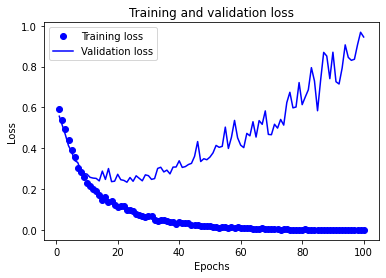

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = build_model('relu')
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=15, batch_size=1, verbose=0)

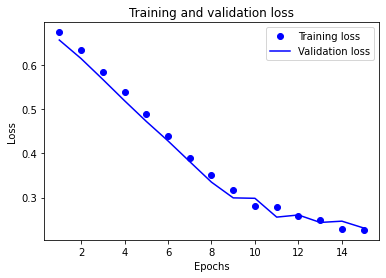

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
val_loss,val_auc = model.evaluate(X_valid, y_valid)

5/5 [==============================] - 0s 3ms/step - loss: 0.2309 - accuracy: 0.9291


In [117]:
model.predict(X_valid)

array([[9.7497481e-01],
       [9.2310011e-01],
       [9.8447150e-01],
       [8.4141964e-01],
       [9.6790910e-01],
       [9.4963396e-01],
       [9.6642768e-01],
       [9.6529150e-01],
       [1.1878228e-01],
       [9.3335807e-01],
       [9.6159482e-01],
       [8.3343089e-03],
       [9.1821647e-01],
       [9.6386743e-01],
       [7.9220325e-02],
       [9.8657656e-01],
       [5.5164737e-01],
       [9.6465552e-01],
       [9.8204923e-01],
       [9.7035980e-01],
       [8.9370310e-01],
       [1.2232411e-01],
       [1.7251584e-01],
       [9.2276716e-01],
       [9.6758866e-01],
       [9.7040701e-01],
       [9.8268247e-01],
       [2.5693458e-01],
       [9.7688019e-01],
       [9.4941574e-01],
       [9.7620004e-01],
       [1.7386675e-04],
       [5.6737661e-02],
       [9.6680099e-01],
       [8.3567095e-01],
       [9.2690730e-01],
       [9.8613040e-05],
       [9.7414982e-01],
       [9.0000784e-01],
       [8.1704587e-02],
       [9.8479187e-01],
       [6.160891